In [8]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6


import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import jv
from scipy.interpolate import interp1d
from numpy.typing import NDArray

# Constants

In [9]:
h = 6.62607015e-34  # V * A * s²
e = 1.602176634e-19 #     A * s
G_0 = 2*e**2/h      # A / V
R_0 = h/(2*e**2)    # V / A

V_gap = 189e-6      # V
Delta = V_gap*e     # V * A * s
nu = 15e9           # 1 / s
pincode = np.array([0.01, 0.25, 0.325, 0.62, 0.8]) # 2.09 G0

# Exp Data 2.09 $G_0$

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(base) Amplitude Study (15GHz, Antenna)
(base eva) Measurement keys preview: ['nu=-1.0dBm', 'nu=-10.0dBm', 'nu=-9.0dBm', 'nu=0.0dBm']
(iv eva) getBackupTemperature()
100%|██████████| 32/32 [00:01<00:00, 27.10it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(iv plot) smoothing = True
(iv plot) window_length = 5
(base plot) saveFigure()
(base plot) saveFigure()


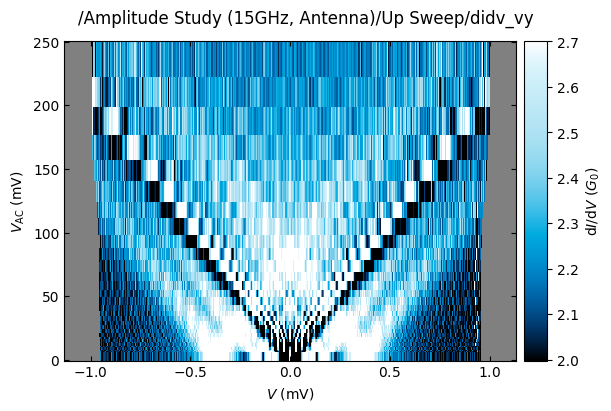

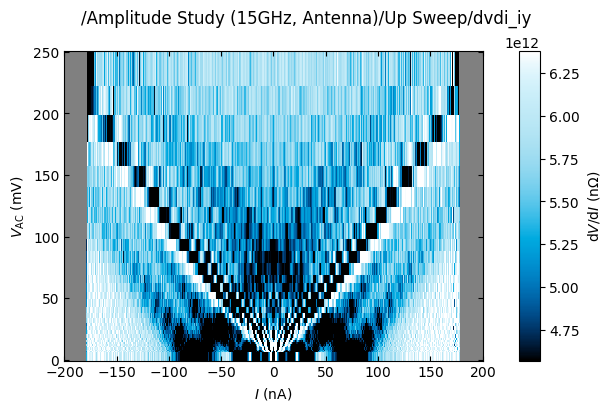

In [10]:
# get exp data
%matplotlib inline
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])

eva = IVPlot()
eva.file_directory = '/Volumes/speedyboy/measurement data 2/'
eva.file_folder = '2023-11-03_1_G0/'
eva.file_name = '2023-11-04_G0_antenna.hdf5'

eva.setAmplifications(10000, 1000)
eva.setV(5.99*V_gap, voltage_bins=1198)
eva.setI(200e-9, current_bins=1000)
eva.setA(0, 0.25, 250)
eva.downsample_frequency = 43

# Amplitude Study (15GHz, Antenna)
eva.title = "Amplitude Study (15GHz, Antenna)"
eva.sub_folder = ""
eva.figure_folder = "data"

eva.setMeasurement("frequency_at_15GHz")
eva.setKeys(index_0=3, index_1=-3, norm=1, to_pop = 'nu=-31.0dBm')
eva.showKeys()
eva.addKey('nu=-31.0dBm', -1000)
eva.up_sweep, = eva.getMaps([1])
eva.up_sweep, = eva.getMapsAmplitude([eva.up_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()

eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.smoothing = True
eva.window_length = 5
eva.plot_T = False
eva.plot_all()

In [11]:
I_exp = eva.up_sweep['current']*h/(2*e*Delta)
dIdV_exp = eva.up_sweep["differential_conductance"]
V_bias_exp = eva.mapped["voltage_axis"]
V_AC = eva.mapped["amplitude_axis"]

I_0_exp = I_exp[0,:]
dIdV_0_exp = dIdV_exp[0, :]
V_0_exp = np.linspace(-5.99, 5.99, 1199, dtype='float64')

In [12]:
# check fitting
with open("DavidOIV/DavidOIV.pickle", "rb") as file:
    theo = pickle.load(file)

tau = theo['tau']
tau_indices = np.zeros(np.shape(pincode), dtype='int')
for i, pin in enumerate(pincode):
    tau_indices[i] = np.argmin(np.abs(tau-pin))
    if np.nanmin(np.abs(tau-pin)) != 0:
        print(f'pincode entry {pin} is approximated with {tau_indices[i]}.')

V_0_theo = theo['V']
I_0_theo = np.sum(theo['I'][tau_indices,:], axis=0)
dIdV_0_theo = np.gradient(I_0_theo, V_0_theo)

pincode entry 0.325 is approximated with 32.


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_70033/1867336761.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$eV$ ($\Delta$)')
/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_70033/1867336761.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$I$ ($2e\Delta/h$)')


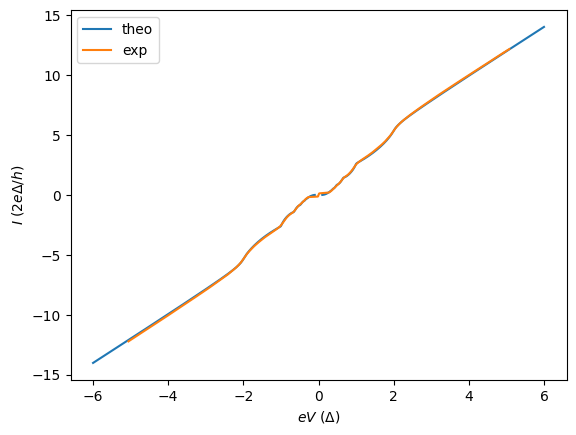

In [13]:
# plot I(V)
plt.plot(V_0_theo, I_0_theo, label='theo')
plt.plot(V_0_exp, I_0_exp, label='exp')
plt.xlabel('$eV$ ($\Delta$)')
plt.ylabel('$I$ ($2e\Delta/h$)')

plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_70033/2716617166.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$eV$ ($\Delta$)')


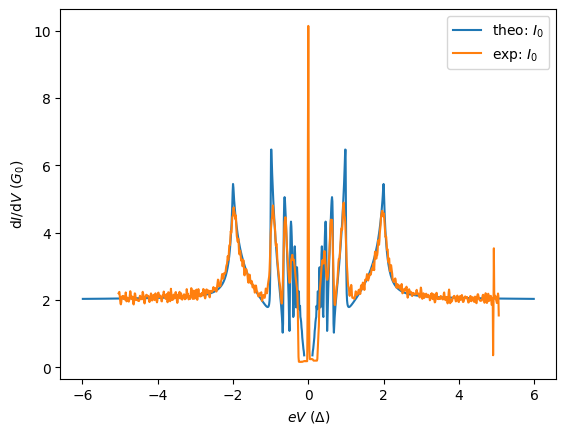

In [14]:
# plot dIdV(V)
plt.plot(V_0_theo, dIdV_0_theo, label='theo: $I_0$')
plt.plot(V_0_exp, dIdV_0_exp, label='exp: $I_0$')
plt.xlabel('$eV$ ($\Delta$)')
plt.ylabel('d$I/$d$V$ ($G_0$)')
plt.legend()

# Tien Gordon Model (exp)
$$
I(\tau_i, V_0, V_\nu) = \sum_{\tau_i} \sum_{n=-N}^N J_n^2\left(\frac{eV_\nu}{h\nu}\right) \cdot I_{0, exp} \left(\frac{eV_0}{\Delta} - n\cdot\frac{h\nu}{\Delta} \right)
$$

In [15]:
def get_Tien_Gordon_exp(
        V_nu: NDArray[np.float64],
        V_0: NDArray[np.float64],
        I_0_exp: NDArray[np.float64],
        nu: float,
        N:int = 400,
        ):
    
    # constants
    h = 6.62607015e-34  # V * A * s²
    e = 1.602176634e-19 #     A * s
    Delta = V_gap * e   # V * A * s

    # Tien Gordon
    I_TG = np.full((V_nu.shape[0], V_0.shape[0]), 0, dtype='float64')

    # sum over channels
    for index, tau_index in enumerate(tau_indices):
        I_0 = I_0_exp
        I_0[np.isnan(I_0)]=0.
        interpolated_I = interp1d(
            V_0, 
            I_0, 
            kind='linear', 
            bounds_error=False, 
            fill_value='extrapolate',
            )
        
        # sum over photons
        for n in range(-N, N+1):
            # Bessel function squared (n)
            J_n_2 = jv(n, V_nu)**2

            # Shift I_0 by n
            V_n = n*h*nu/(Delta)
            I_n = interpolated_I(V_0 - V_n)

            # Calculate the n'th current 
            I_n, J_n_2 = np.meshgrid(I_n, J_n_2)

            # Sum up current
            I_TG += J_n_2 * I_n
        
    return I_TG        
    

I_TG_exp = get_Tien_Gordon_exp(
        V_0 = eV_bias_over_delta_exp,
        V_nu = np.linspace(0, 25, 401, dtype='float64'),
        I_0_exp = I_0_exp,
        nu = 15e9,
    )


NameError: name 'eV_bias_over_delta_exp' is not defined

# Tien Gordon Model
$$
I(\tau_i, V_0, V_\nu) = \sum_{\tau_i} \sum_{n=-N}^N J_n^2\left(\frac{eV_\nu}{h\nu}\right) \cdot I_0 \left(\tau_i, \frac{eV_0}{\Delta} - n\cdot\frac{h\nu}{\Delta} \right)
$$

In [ ]:
def get_Tien_Gordon(
        V_nu: NDArray[np.float64],
        pincode: NDArray[np.float64],
        nu: float,
        model: str = 'CarlosIV',
        V_gap: float = 189e-6,
        N:int = 400,
        ):
    
    # constants
    h = 6.62607015e-34  # V * A * s²
    e = 1.602176634e-19 #     A * s
    Delta = V_gap * e   # V * A * s
    
    # models
    models = ['CarlosIV', 'DavidOIV']
    match model:
        case 'CarlosIV':
            with open("CarlosIV/CarlosIV.pickle", "rb") as file:
                IVs = pickle.load(file)
        case 'DavidOIV':
            with open("DavidOIV/DavidOIV.pickle", "rb") as file:
                IVs = pickle.load(file)
        case _:
            raise KeyError (f"Unknown model, Expected: {models}")
        
    tau = IVs['tau']
    tau_indices = np.zeros(np.shape(pincode), dtype='int')
    for i, pin in enumerate(pincode):
        tau_indices[i] = np.argmin(np.abs(tau-pin))
        if np.nanmin(np.abs(tau-pin)) != 0:
            print(f'pincode entry {pin} is approximated with {tau_indices[i]}.')

    # Tien Gordon
    V_0 = IVs['V']
    I_TG = np.full((V_nu.shape[0], V_0.shape[0]), 0, dtype='float64')

    # sum over channels
    for index, tau_index in enumerate(tau_indices):
        I_0 = IVs['I'][tau_index, :]
        I_0[np.isnan(I_0)]=0.
        interpolated_I = interp1d(
            V_0, 
            I_0, 
            kind='linear', 
            bounds_error=False, 
            fill_value='extrapolate',
            )
        
        # sum over photons
        for n in range(-N, N+1):
            # Bessel function squared (n)
            J_n_2 = jv(n, V_nu)**2

            # Shift I_0 by n
            V_n = n*h*nu/(Delta)
            I_n = interpolated_I(V_0 - V_n)

            # Calculate the n'th current 
            I_n, J_n_2 = np.meshgrid(I_n, J_n_2)

            # Sum up current
            I_TG += J_n_2 * I_n
        
    return V_0, I_TG        
    

V_0, I_TG = get_Tien_Gordon(
        V_nu = np.linspace(0, 25, 401, dtype='float64'),
        pincode=np.array([ 0.1, .005]),
        nu = 15e9,
        model='DavidOIV',
    )


pincode entry 0.005 is approximated with 0.


# PAMAR
$$
I(\tau_i, V_0, V_\nu) = \sum_{\tau_i} \sum_{m=1}^M \sum_{n=-N}^N J_n^2\left(m \cdot \frac{eV_\nu}{h\nu}\right) \cdot I_{0} \left(\tau_i, m, \frac{eV_0}{\Delta} - \frac{n}{m}\cdot\frac{h\nu}{\Delta} \right)
$$

In [ ]:
def get_PAMAR(
        V_nu: NDArray[np.float64],
        pincode: NDArray[np.float64],
        nu: float,
        model: str = 'DavidOIV',
        V_gap: float = 189e-6,
        N: int = 20,
        M: int = 19,
        ):
    
    # constants
    h = 6.62607015e-34  # V * A * s²
    e = 1.602176634e-19 #     A * s
    Delta = V_gap * e   # V * A * s
    
    # models
    models = ['DavidOIV']
    match model:
        case 'DavidOIV':
            with open("DavidOIV/DavidOIV.pickle", "rb") as file:
                IVs = pickle.load(file)
        case _:
            raise KeyError (f"Unknown model, Expected: {models}")
        
    tau = IVs['tau']
    tau_indices = np.zeros(np.shape(pincode), dtype='int')
    for i, pin in enumerate(pincode):
        tau_indices[i] = np.argmin(np.abs(tau-pin))
        if np.nanmin(np.abs(tau-pin)) != 0:
            print(f'pincode entry {pin} is approximated with {tau_indices[i]}.')

    # Tien Gordon
    V_0 = IVs['V']
    I_TG = np.full((V_nu.shape[0], V_0.shape[0]), 0, dtype='float64')

    # sum over channels
    for index, tau_index in enumerate(tqdm(tau_indices)):
        I_0_m = IVs['I_m'][tau_index, :]
        I_0_m[np.isnan(I_0_m)]=0.

        # sum over charges
        for i_m, m in enumerate(np.arange(1, M+1)):

            # define interpolate
            I_m_ip = interp1d(
                V_0, 
                I_0_m[i_m], 
                kind='linear', 
                bounds_error=False, 
                fill_value='extrapolate',
                )

            # sum over photons
            for i_n, n in enumerate(np.arange(-N,N+1)):

                # Bessel function squared (n)
                J_n_m_2 = jv(n, m*V_nu)**2

                # Shift I_0 by n/m
                V_n_m = n/m*h*nu/Delta
                I_n_m = I_m_ip(V_0 + V_n_m)

                # Calculate the n'th current 
                I_n_m, J_n_m_2 = np.meshgrid(I_n_m, J_n_m_2)

                # Sum up current
                I_TG += I_n_m * J_n_m_2
        
    return V_0, I_TG

# Calculate Simulations

In [76]:
V_nu = np.linspace(0, 25, 401, dtype='float64')
nu = 15e9
M=20
N=100

V_0_theo, I_PAMAR = get_PAMAR(
        V_nu = V_nu,
        pincode=pincode,
        nu = nu,
        model='DavidOIV',
        M=M, N=N,
    )
V_0_theo, I_TG_theo = get_Tien_Gordon(
        V_nu = V_nu,
        pincode=pincode,
        nu = nu,
        model='DavidOIV',
        N=N,
    )
I_TG_exp = get_Tien_Gordon_exp(
        V_0 = V_0_exp,
        V_nu = V_nu,
        I_0_exp = I_0_exp,
        nu = nu,
    )

dIdV_TG_exp = np.gradient(I_TG_exp, V_0_exp, axis=1)
dIdV_TG_theo = np.gradient(I_TG_theo, V_0_theo, axis=1)
dIdV_PAMAR = np.gradient(I_PAMAR, V_0_theo, axis=1)


pincode entry 0.325 is approximated with 32.


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:49<00:00,  9.83s/it]


pincode entry 0.325 is approximated with 32.


NameError: name 'V_0_exp' is not defined

Text(0.5, 1.0, 'PAMAR')

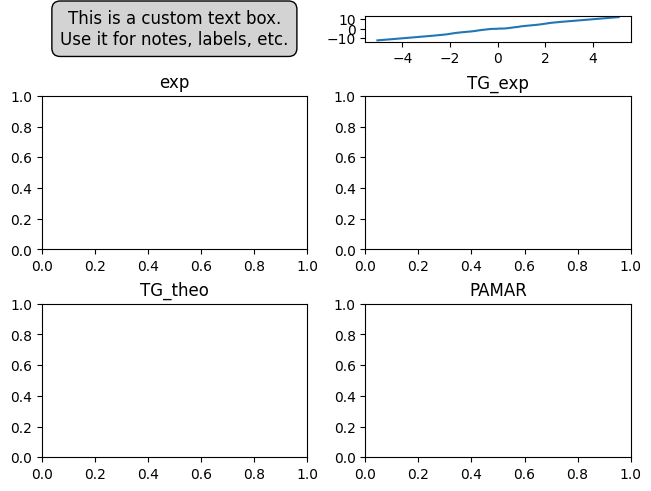

In [23]:
fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=3, width_ratios=[3, 3],
                          height_ratios=[.5, 3, 3])

ax_info = fig.add_subplot(spec[0,0])
ax_info.axis("off")
ax_info.text(
    0.5, 0.5,
    "This is a custom text box.\nUse it for notes, labels, etc.",
    ha='center', va='center', fontsize=12, wrap=True,
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5')
)

cax = fig.add_subplot(spec[0,1])
cax.plot(V_0_exp, I_0_exp)

ax_exp = fig.add_subplot(spec[1,0])
ax_exp.set_title('exp')

ax_TG_exp = fig.add_subplot(spec[1,1])
ax_TG_exp.set_title('TG_exp')

ax_TG_theo = fig.add_subplot(spec[2,0])
ax_TG_theo.set_title('TG_theo')

ax_PAMAR = fig.add_subplot(spec[2,1])
ax_PAMAR.set_title('PAMAR')



(0.0, 25.0)

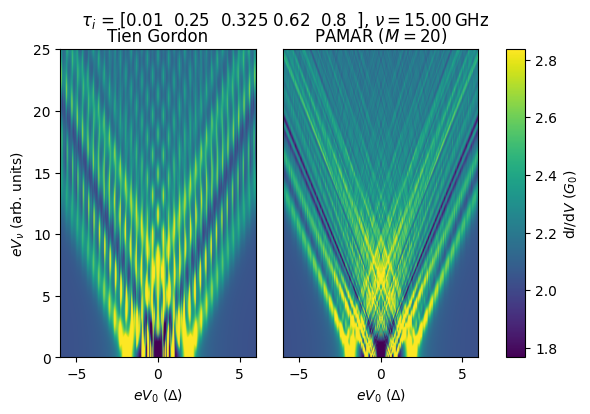

In [12]:
%matplotlib inline
import matplotlib.gridspec as gridspec

plt.close('all')

fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[2, 2, .2])
ax_TG = fig.add_subplot(gs[0])
ax_PAMAR = fig.add_subplot(gs[1])
cax = fig.add_subplot(gs[2])
c=2
z0 = np.gradient(I_TG, V_0, axis=1)
z1 = np.gradient(I_PAMAR, V_0, axis=1)
z = np.concatenate((z0, z1))
clim = (np.nanmean(z)-np.nanstd(z)*c, np.nanmean(z)+np.nanstd(z)*c)
im = ax_TG.imshow(z0, 
           extent=(V_0[0], V_0[-1], V_nu[0], V_nu[-1]),
           clim = clim,
           aspect='auto', origin='lower',
           interpolation=None)
ax_PAMAR.imshow(z1, 
           extent=(V_0[0], V_0[-1], V_nu[0], V_nu[-1]),
           clim = clim,
           aspect='auto', origin='lower',
           interpolation=None)

fig.colorbar(im, cax=cax, label=r'd$I/$d$V$ ($G_0$)')
ax_TG.set_ylabel(r'$eV_\nu$ (arb. units)')
ax_TG.set_xlabel(r'$eV_0$ ($\Delta$)')
ax_PAMAR.set_xlabel(r'$eV_0$ ($\Delta$)')
ax_PAMAR.set_yticks([])

ax_TG.set_title('Tien Gordon')
ax_PAMAR.set_title(f'PAMAR ($M={M}$)')

fig.suptitle(rf'$\tau_i$ = {pincode}, $\nu = {nu*1e-9:.02f}\,$GHz')

y_lim = (0, 25)
ax_TG.set_ylim(y_lim)
ax_PAMAR.set_ylim(y_lim)

In [239]:
np.arange(1, 20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [128]:
range(20)

range(0, 20)

In [181]:
np.arange(1,2)

array([1])

In [80]:
# Load the data
file = "iv_0.05.dat"
eV_bias, I_0 = np.loadtxt(file, unpack=True)

eV_bias = np.concatenate((-np.flip(eV_bias), eV_bias))
I_0 = np.concatenate((-np.flip(I_0), I_0))

dIdV_0 = np.gradient(I_0, eV_bias)
eV_omega = np.linspace(0, 25, 401)

FileNotFoundError: iv_0.05.dat not found.

In [ ]:



dIdV_TG = np.zeros((len(eV_omega), len(eV_bias)))
I_TG = np.zeros((len(eV_omega), len(eV_bias)))

# Interpolate I_0 to match the eV_bias
interpolated_I = interp1d(eV_bias, I_0, kind='linear', bounds_error=False, fill_value='extrapolate')
interpolated_dIdV = interp1d(eV_bias, dIdV_0, kind='linear', bounds_error=False, fill_value='extrapolate')

N = 400
for n in range(-N, N+1):
    # Bessel function squared (n)
    J_n_2 = jv(n, eV_omega)**2

    # Shifted I_0
    eV_n = n*h*nu/(Delta)
    I_n = interpolated_I(eV_bias - eV_n)
    dIdV_n = interpolated_dIdV(eV_bias - eV_n)

    # plt.plot(eV_bias, dIdV_n)

    # # Calculate the current
    I_n, _ = np.meshgrid(I_n, J_n_2)
    dIdV_n, J_n_2 = np.meshgrid(dIdV_n, J_n_2)

    I_TG += J_n_2 * I_n
    dIdV_TG += J_n_2 * dIdV_n

NameError: name 'eV_omega' is not defined

In [85]:
from scipy.integrate import cumulative_trapezoid
# Integrate dI/dV to get I(V)
z = cumulative_trapezoid(dIdV_TG, eV_bias, initial=0)  # initial=0 sets I(V[0]) = 0
z = np.gradient(I_TG, eV_bias, axis=1)

NameError: name 'dIdV_TG' is not defined

Text(0.5, 0, '$eV_0$ ($\\Delta$)')

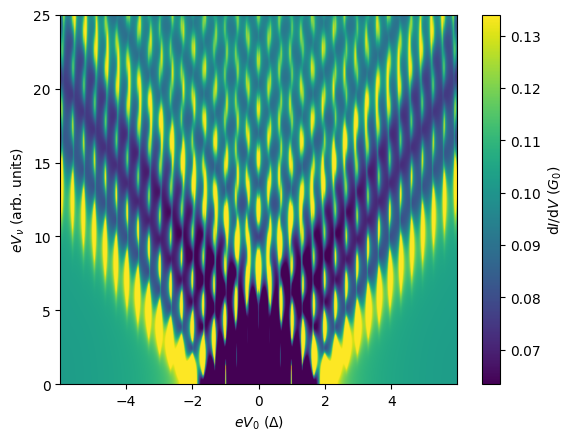

In [120]:
z = np.gradient(I_TG, V_0, axis=1)
clim = (np.nanmean(z)-np.nanstd(z), np.nanmean(z)+np.nanstd(z))
plt.imshow(z, 
           extent=(V_0[0], V_0[-1], V_nu[0], V_nu[-1]),
           clim = clim,
           aspect='auto', origin='lower',
           interpolation=None)
plt.colorbar(label=r'd$I/$d$V$ ($G_0$)')
plt.ylabel(r'$eV_\nu$ (arb. units)')
plt.xlabel(r'$eV_0$ ($\Delta$)')